In [33]:
%run ../../scAAnet/api.py
%run ../../scAAnet/train.py
%run ../../scAAnet/network.py
%run ../../scAAnet/tools.py
%run ../../scripts/functions.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import silhouette_score
import scanpy as sc
import tensorflow as tf
import anndata as ad
np.random.seed(42)
tf.random.set_seed(42)

# data set up

In [34]:
data_path = '../../data/only_healthy_data'
figure_path = '../../figures/exp03/2_figures'
pathways = pd.read_csv(f'{data_path}/batchfix_paths_healthy_samples_pathway_counts.csv', sep=',', index_col=0, header=0)
metadata = pd.read_csv(f'{data_path}/batchfix_paths_healthy_samples_pathway_metadata.csv', sep=',', index_col=0, header=0)
metadata.rename(columns={'Global.Region': 'Global Region'}, inplace=True)


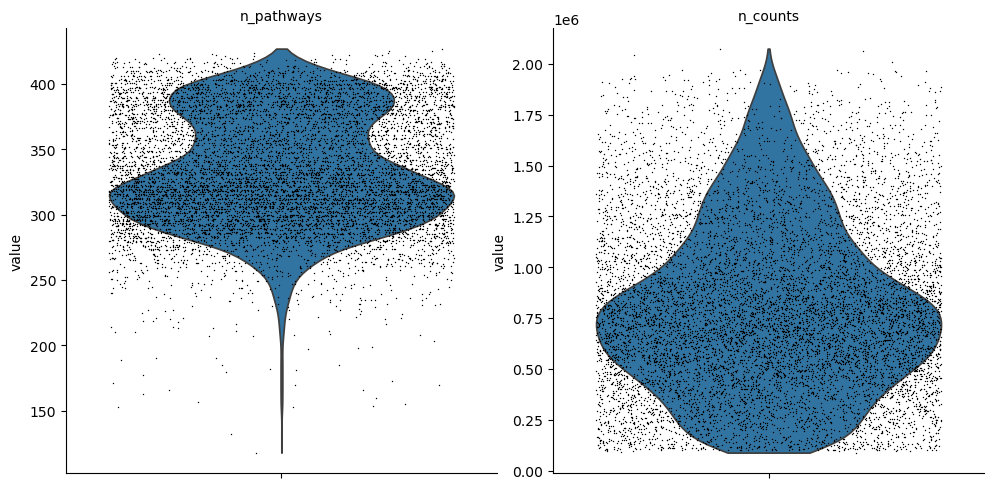

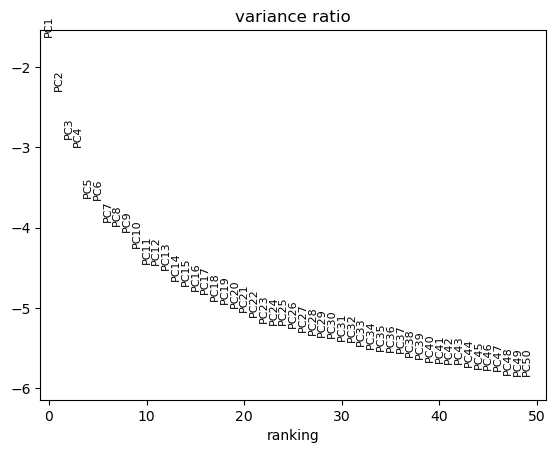

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


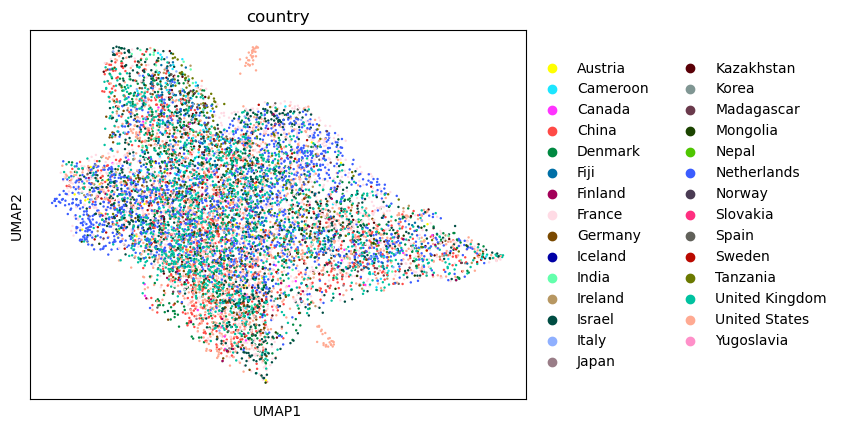

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


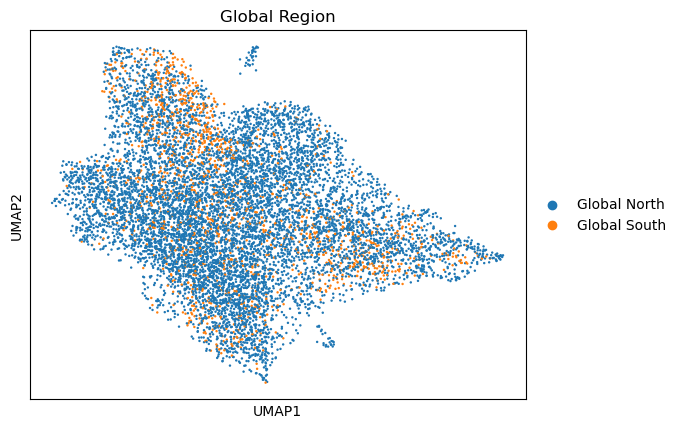

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


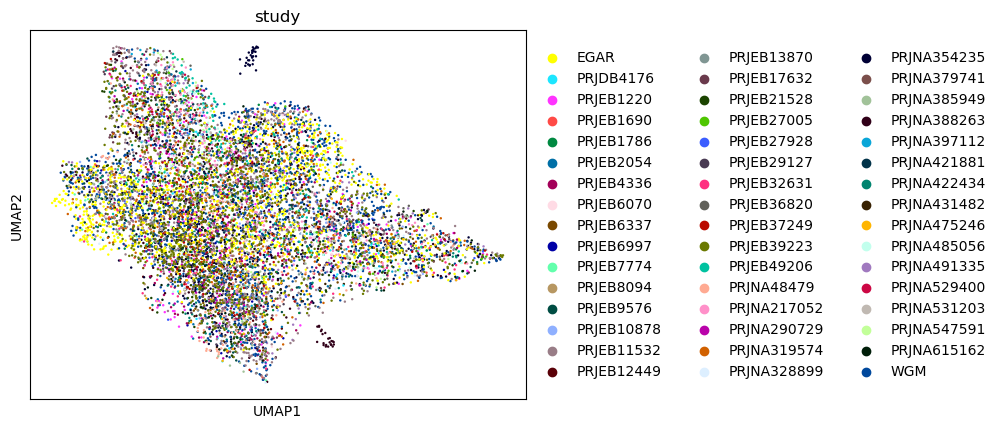

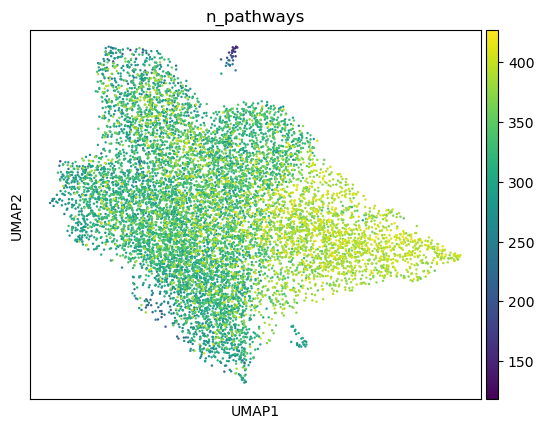

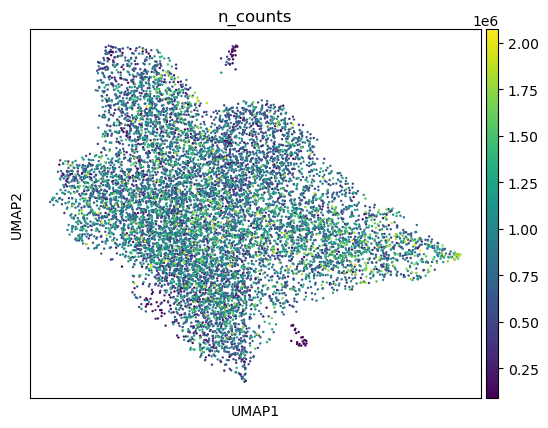

In [35]:
concat_ad = convertToAnnData(pathways, metadata)

# 150rs k = 3 analysis

In [36]:
pathways

,ERR688551,ERR688544,ERR710432,ERR688610,ERR688646,ERR688530,ERR688523,ERR688594,ERR688507,ERR688614,...,SRR8146983,SRR8146959,SRR8146939,SRR8146973,SRR6367598,SRR8146942,SRR6367587,SRR8146941,SRR8146955,SRR8146972
PWY-7238: sucrose biosynthesis II,8177.0,12002.0,11358.0,11938.0,18584.0,26703.0,19411.0,15684.0,23201.0,8077.000000,...,8006.0,15147.000000,10380.0,11890.0,28472.0,10876.000000,10550.0,9953.000000,16009.0,8093.0
PWY-1042: glycolysis IV,9792.0,12813.0,15217.0,19707.0,17683.0,22061.0,21370.0,9470.0,23678.0,8543.000000,...,10606.0,13858.000000,9858.0,11515.0,19036.0,11444.000000,9883.0,10829.000000,16787.0,10246.0
GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose),7290.0,10803.0,6481.0,9502.0,16253.0,17756.0,16828.0,9985.0,18508.0,6665.000000,...,7207.0,13928.000000,9162.0,10061.0,19823.0,9353.000000,9463.0,7817.000000,13542.0,7089.0
VALSYN-PWY: L-valine biosynthesis,8489.0,7916.0,11455.0,10900.0,18610.0,20511.0,16622.0,15525.0,21342.0,6542.000000,...,5689.0,10897.000000,7841.0,9582.0,20296.0,9115.000000,10404.0,6784.000000,13605.0,6714.0
ILEUSYN-PWY: L-isoleucine biosynthesis I (from threonine),7989.0,7342.0,11026.0,10131.0,16306.0,19677.0,15390.0,13513.0,20026.0,5889.000000,...,5507.0,10349.000000,7600.0,9027.0,17971.0,8528.000000,10007.0,6016.000000,13244.0,6436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWY-7000: kanamycin biosynthesis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.769638,...,0.0,47.967045,0.0,0.0,0.0,25.902553,0.0,54.111046,0.0,0.0
PWY-7723: bacterial bioluminescence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
PWY-7805: (aminomethyl)phosphonate degradation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.0,0.000000,0.0,1.0,0.0,1.000000,1.0,0.000000,0.0,1.0
PWY0-461: L-lysine degradation I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0


In [37]:
import pickle
with open('../../data/scAAnet_output/pathways_150rs_k3_scAAnet.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

In [38]:
for r in range(150):
    loaded_results[(3, r)]['gene_score'] = geneScore(pd.DataFrame(loaded_results[(3, r)]['spectra']).transpose())
    loaded_results[(3, r)]['gene_score'].index = concat_ad.var.index
    loaded_results[(3, r)]['gene_score'].columns = ['type1', 'type2', 'type3']

{0: 152, 1: 149, 2: 149}


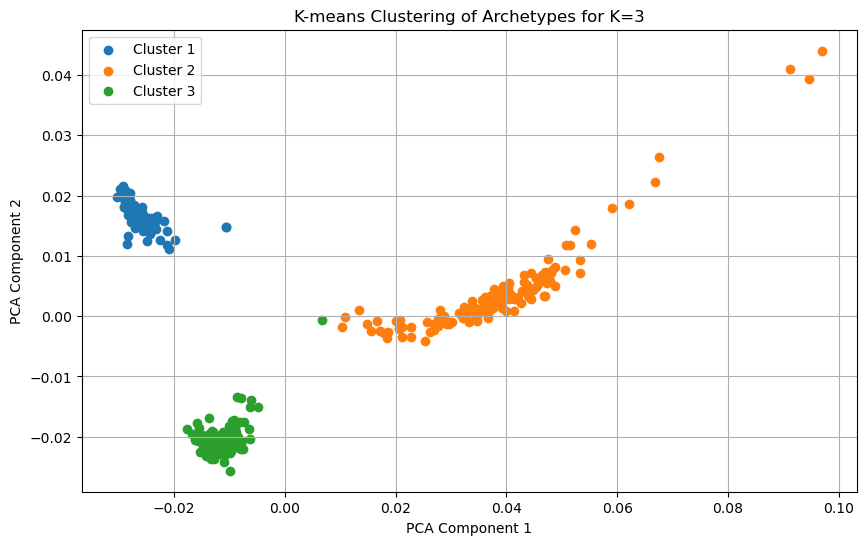

  PCA Component  Explained Variance Ratio  Weighted Importance  \
0           PC1                  0.653525             0.653525   
1           PC2                  0.204861             0.204861   

   Normalized Weighted Importance  
0                        0.761342  
1                        0.238658  


In [39]:
plotPCA(k=3, results=loaded_results, n_components=2, states = 150)

In [40]:
k_min = 3
k_max = 3
step = 1
n_rep = 150
stability_results_df, labels_dict = StabilityArchetype(loaded_results, k_min, k_max, step, n_rep)

k = 3
label_dfs = extract_rows_by_label(loaded_results, labels_dict, k, n_rep)
stability_results_df


,K,Stability
0,3,0.752398


In [41]:
for rs in range(150):
    if (3, rs) in loaded_results:
        # Get the current spectra DataFrame
        spectra_df = pd.DataFrame(loaded_results[(3, rs)]['spectra']).transpose()

        # Extract the three labels for the current state
        state_labels = labels_dict[3][rs*3:(rs+1)*3]
        
        # Rename the columns according to the extracted labels
        new_column_names = [f"Type {label}" for label in state_labels]
        spectra_df.columns = new_column_names

        # Store the renamed DataFrame back in the loaded_results dictionary
        loaded_results[(3, rs)]['spectra_labelled'] = spectra_df


In [42]:
from pprint import pprint
# Splitting the values into lists of 3
values = labels_dict[3]
split_lists = [values[i:i + 3] for i in range(0, len(values), 3)]

# Finding lists with duplicate values
lists_with_duplicates = [lst for lst in split_lists if len(lst) != len(set(lst))]

pprint(lists_with_duplicates)
# Keys to remove because of archetypes getting same k means label
keys_to_remove = [(3, 5), (3, 26)]

# Remove the specified keys from the dictionary
for key in keys_to_remove:
    if key in loaded_results:
        del loaded_results[key]

[15    3
16    3
17    1
dtype: int32,
 78    2
79    1
80    1
dtype: int32,
 426    1
427    2
428    1
dtype: int32]


In [43]:
# Initialize an empty dictionary
first_100_results = {}
# Populate first_100_results with the first 100 elements
for r in range(102):
    key = (3, r)
    if key in loaded_results:
        first_100_results[key] = loaded_results[key]
    else:
        print(f"Key {key} not found in loaded_results")

Key (3, 5) not found in loaded_results
Key (3, 26) not found in loaded_results


In [44]:
cluster_stability = StabilityPerArchetype(loaded_results, k_min=3, k_max=3, step=1, n_rep=150)
for k in cluster_stability:
    print(k)
    print()

   Cluster  Silhouette  K
0        1    0.856912  3
1        2    0.602635  3
2        3    0.818734  3



In [45]:
import pickle
# Assuming `results` is the dictionary you want to save
with open('../../data/scAAnet_output/clean_100_rs.pkl', 'wb') as f:
    pickle.dump(first_100_results, f)

/tmp/ipykernel_1515886/2337408796.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', k)


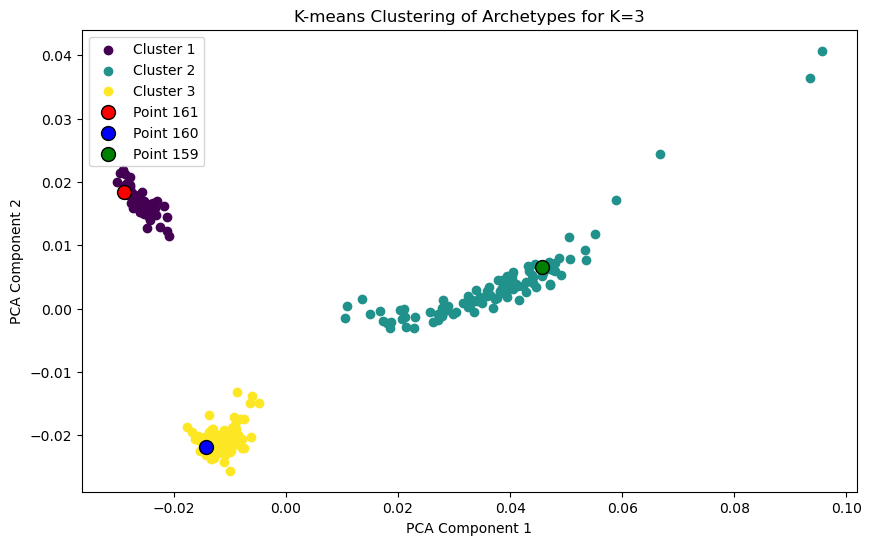

  PCA Component  Explained Variance Ratio  Weighted Importance  \
0           PC1                  0.656030             0.656030   
1           PC2                  0.208993             0.208993   

   Normalized Weighted Importance  
0                        0.758396  
1                        0.241604  


In [46]:
def plotPCA(k, results, n_components, states):
    all_arch = []
    for rs in range(0, states):  # Example range of rs
        if (k, rs) in results:
            decoded_data = results[(k, rs)]['spectra']
            all_arch.append(decoded_data)

    # Combine all decoded data
    arch = np.concatenate(all_arch, axis=0)
    arch_df = pd.DataFrame(arch)

    # Perform K-means clustering
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1)
    kmeans_model.fit(arch_df)
    kmeans_labels = kmeans_model.labels_

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    arch_pca = pca.fit_transform(arch_df)

    # Plot the K-means clustering results
    plt.figure(figsize=(10, 6))
    
    # Generate a colormap
    colors = plt.cm.get_cmap('viridis', k)
    
    # Plot clusters with colormap
    for i in range(k):
        cluster_points = arch_pca[kmeans_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    label=f'Cluster {i+1}', color=colors(i))
    
    # Points to highlight with distinct colors
    specific_indices = [161, 160, 159]
    specific_colors = ['red', 'blue', 'green']  # Distinct colors for specific points

    for idx, specific_index in enumerate(specific_indices):
        plt.scatter(arch_pca[specific_index, 0], arch_pca[specific_index, 1], 
                    color=specific_colors[idx], 
                    edgecolor='black', 
                    s=100,  # Larger size for emphasis
                    label=f'Point {specific_index}')
    
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"K-means Clustering of Archetypes for K={k}")
    plt.legend()
    #plt.grid(True)
    plt.savefig(f'{figure_path}/S6_pca_clean100rs.png')
    plt.show()
    weightedPCA(pca)

# Example usage
plotPCA(k=3, results=first_100_results, n_components=2, states=150)


In [47]:
k_min = 3
k_max = 3
step = 1
n_rep = 150

stability_results_df, labels_dict = StabilityArchetype(first_100_results, k_min, k_max, step, n_rep)
print(stability_results_df)

k = 3
label_dfs = extract_rows_by_label(first_100_results, labels_dict, k, n_rep)

   K  Stability
0  3   0.752584


# best state based on mean and distinct types - to avoid outlier states

In [48]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np

def calculate_mean_archetypes(states_archetypes):
    mean_archetypes = {}
    for type_label in states_archetypes[0].columns:
        type_archetypes = np.array([state[type_label].values for state in states_archetypes])
        mean_archetypes[type_label] = np.mean(type_archetypes, axis=0)
    return mean_archetypes

def calculate_combined_scores(states_archetypes, mean_archetypes):
    combined_scores = []
    
    for state_archetypes in states_archetypes:
        mean_similarity_score = 0
        divergence_score = 0
        
        for type_label in state_archetypes.columns:
            # Calculate similarity to the mean archetype for each type
            mean_similarity = cosine_similarity(state_archetypes[type_label].values.reshape(1, -1), 
                                                mean_archetypes[type_label].reshape(1, -1))[0, 0]
            mean_similarity_score += mean_similarity
            
            # Calculate pairwise distances between archetypes within the state
            pairwise_distances = euclidean_distances(state_archetypes.T)
            divergence_score += np.sum(np.triu(pairwise_distances, 1))
        
        # Combine the similarity to the mean and the divergence score by adding them
        combined_score = mean_similarity_score + (0.5 * divergence_score)
        combined_scores.append(combined_score)
    
    return np.argsort(combined_scores)[::-1], np.array(combined_scores)

states_archetypes_original = []
for rs in range(0, n_rep):
    if (3, rs) in first_100_results:
        decoded_data = first_100_results[(3, rs)]['spectra_labelled']
        states_archetypes_original.append(decoded_data)

# Step 1: Calculate mean archetypes for each type
mean_archetypes = calculate_mean_archetypes(states_archetypes_original)

# Step 2: Calculate combined scores for each state
sorted_indices, combined_scores = calculate_combined_scores(states_archetypes_original, mean_archetypes)

# Step 3: Get the top 5 states based on the combined score
top_5_indices = sorted_indices[:5]
top_5_scores = combined_scores[top_5_indices]

print("Top 5 states based on combined score:")
for index, score in zip(top_5_indices, top_5_scores):
    print(f"State {index}: Combined Score = {score:.4f}")


Top 5 states based on combined score:
State 53: Combined Score = 3.2596
State 74: Combined Score = 3.2589
State 1: Combined Score = 3.2569
State 76: Combined Score = 3.2561
State 50: Combined Score = 3.2556
